<a href="https://colab.research.google.com/github/lotrmay/TensorFlow_Learning/blob/master/functionalKerasApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(18775, 102)
(15958, 48)
[[0.52672727 0.752      0.48894737 ... 0.29836048 0.2844     0.45219512]
 [0.598      0.661      0.37105263 ... 0.36539631 0.14185455 0.60756098]
 [0.58909091 0.6855     0.41526316 ... 0.27495114 0.24876364 0.54780488]
 ...
 [0.44951515 0.556      0.33421053 ... 0.28346363 0.29509091 0.47609756]
 [0.55048485 0.71       0.48894737 ... 0.32176982 0.30221818 0.5597561 ]
 [0.47327273 0.584      0.45210526 ... 0.39306189 0.23450909 0.6195122 ]]
(15958, 48)
[[0.57170732 0.66780822 0.35734177 ... 0.2765272  0.51601307 0.54803922]
 [0.53585366 0.33890411 0.12164557 ... 0.15351464 0.22137255 0.42633987]
 [0.64341463 0.50671233 0.35113924 ... 0.28062762 0.43915033 0.41993464]
 ...
 [0.60756098 0.57383562 0.37594937 ... 0.22322176 0.44555556 0.36228758]
 [0.59560976 0.74332192 0.37594937 ... 0.28062762 0.52882353 0.57366013]
 [0.59560976 0.68794521 0.28911392 ... 0.2109205  0.48398693 0.45196078]]
[INFO] training model...
Epoch 1/10
125/125 [==============================

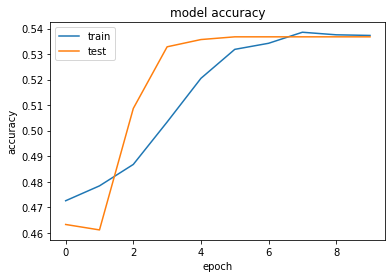

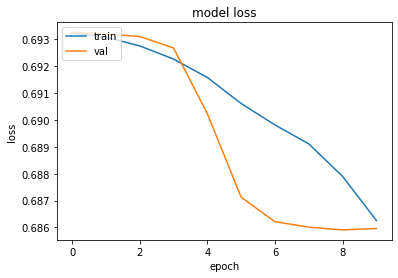

In [20]:
%tensorflow_version 2.x
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import numpy as np #better arrays in python, lepší práce s multidimenzionálními poli
import pandas as pd #data analytics tool, lepší manipulace s daty, dokáže například cut outnout column
import matplotlib.pyplot as plt #vizualizace tabulek a grafů
from IPython.display import clear_output #jen pro tenhle notebook
from six.moves import urllib
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import utils as np_utils
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import keras
from keras.layers import concatenate
import shap
import xgboost



CSV_COLUMN_NAMES=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg','Match_link','Result','team_one_name','team_two_name']
CSV_COLUMN_NAMES2=['Odds_firstTeam','Odds_secondTeam','Rank_firstTeam','Rank_secondTeam','WinRate_firstTeam','WinRate_secondTeam','PistolWinRate_firstTeam','PistolWinRate_secondTeam',
                  'playerAARating','playerAADpr','playerAAKast','playerAAImpact','playerAAAdr','playerAAKpr','playerAAHs','playerAAKD','playerAAGrenadeDmg',
                  'playerABRating','playerABDpr','playerABKast','playerABImpact','playerABAdr','playerABKpr','playerABHs','playerABKD','playerABGrenadeDmg',
                  'playerACRating','playerACDpr','playerACKast','playerACImpact','playerACAdr','playerACKpr','playerACHs','playerACKD','playerACGrenadeDmg',
                  'playerADRating','playerADDpr','playerADKast','playerADImpact','playerADAdr','playerADKpr','playerADHs','playerADKD','playerADGrenadeDmg',
                  'playerAERating','playerAEDpr','playerAEKast','playerAEImpact','playerAEAdr','playerAEKpr','playerAEHs','playerAEKD','playerAEGrenadeDmg',
                  'playerBARating','playerBADpr','playerBAKast','playerBAImpact','playerBAAdr','playerBAKpr','playerBAHs','playerBAKD','playerBAGrenadeDmg',
                  'playerBBRating','playerBBDpr','playerBBKast','playerBBImpact','playerBBAdr','playerBBKpr','playerBBHs','playerBBKD','playerBBGrenadeDmg',
                  'playerBCRating','playerBCDpr','playerBCKast','playerBCImpact','playerBCAdr','playerBCKpr','playerBCHs','playerBCKD','playerBCGrenadeDmg',
                  'playerBDRating','playerBDDpr','playerBDKast','playerBDImpact','playerBDAdr','playerBDKpr','playerBDHs','playerBDKD','playerBDGrenadeDmg',
                  'playerBERating','playerBEDpr','playerBEKast','playerBEImpact','playerBEAdr','playerBEKpr','playerBEHs','playerBEKD','playerBEGrenadeDmg']
train=pd.read_csv('/content/pokus.csv',sep=";",names=CSV_COLUMN_NAMES,error_bad_lines=False,header=None)
print(train.shape)
#tady se train shufflne

#train_y=train.pop('Result')
#test_y=test.pop('Result')
train.pop('Match_link')
train.pop('team_one_name')
train.pop('team_two_name')

target_column = ['Result'] 
predictors = list(set(list(train.columns))-set(target_column))
scaler = MinMaxScaler(feature_range=(0.01, 0.99))
norm = StandardScaler()
train[predictors]=norm.fit_transform(train[predictors])
train[predictors] = scaler.fit_transform(train[predictors])


#train[predictors] = train[predictors]/train[predictors].max()

X = train[predictors].values
y = train[target_column].values
#print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)#32 #888
results=train['Result']
trainFirstTeams=X_train[:,[0,2,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]]
trainSecondTeams=X_train[:,[1,3,5,7,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96]]
testFirstTeams=X_test[:,[0,2,4,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51]]
testSecondTeams=X_test[:,[1,3,5,7,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96]]
print(trainFirstTeams.shape)
print(trainFirstTeams)
print(trainSecondTeams.shape)
print(trainSecondTeams)



inputA = keras.Input(shape=(48,))
inputB = keras.Input(shape=(48,))

x = Dense(48, activation="relu")(inputA)
x = keras.layers.Dropout(0.2)(x)
x = Dense(24, activation="relu")(x)
x = keras.layers.Dropout(0.2)(x)
x = Dense(8, activation="relu")(x)
x = keras.Model(inputs=inputA, outputs=x)

y = Dense(48, activation="relu")(inputB)
y = keras.layers.Dropout(0.2)(y)
y = Dense(24, activation="relu")(y)
y = keras.layers.Dropout(0.2)(y)
y = Dense(8, activation="relu")(y)
y = keras.Model(inputs=inputB, outputs=y)

combined = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(combined)
z = Dense(1, activation="sigmoid")(z)

# our model will accept the inputs of the two branches and
# then output a single value
model = keras.Model(inputs=[x.input, y.input], outputs=z)
#shufflovat se může jen před rozdělením polí


model.compile(optimizer=keras.optimizers.Adadelta(learning_rate=0.015), #keras.optimizers.SGD(learning_rate=0.01)
              loss='binary_crossentropy', 
              metrics=['accuracy'])
# train the model
print("[INFO] training model...")
'''
print(trainFirstTeams.shape)
print(trainSecondTeams.shape)
print(testFirstTeams.shape)
print(testSecondTeams.shape)
'''

history = model.fit(x=[trainFirstTeams,trainSecondTeams], y=y_train,validation_data=([testFirstTeams, testSecondTeams], y_test),epochs=10, batch_size=128)


# make predictions on the testing data
print("[INFO] predicting...")
pred_train = model.predict([testFirstTeams, testSecondTeams])

scores = model.evaluate([trainFirstTeams, trainSecondTeams], y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
pred_test= model.predict([testFirstTeams, testSecondTeams])

scores2 = model.evaluate([testFirstTeams, testSecondTeams], y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn import metrics  
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
feature_imp = pd.Series(clf.feature_importances_, index = CSV_COLUMN_NAMES2).sort_values(ascending = False)
print(feature_imp)


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


ACCURACY OF THE MODEL:  0.6883209087681931
playerADKpr                 0.067425
PistolWinRate_secondTeam    0.061465
playerBARating              0.016299
playerADHs                  0.015264
playerADKD                  0.010992
                              ...   
playerABRating              0.006553
playerADRating              0.006515
playerADDpr                 0.006295
playerBERating              0.006204
playerBCHs                  0.006155
Length: 98, dtype: float64
